<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/BUOI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=46af89a0bd33160feccdf4bd01ba748b1a5f873e708d8731cf2c7a49fc5cc967
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


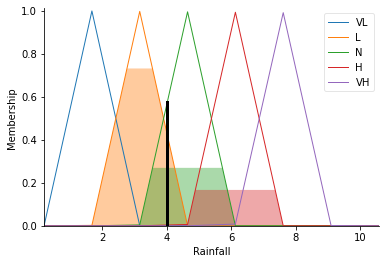

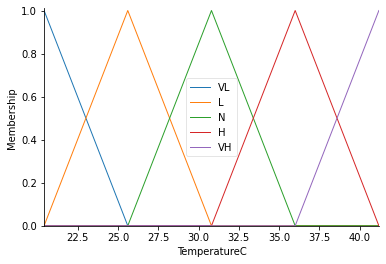

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
T = ctrl.Antecedent(np.arange(20.4,46.4,5.2),'TemperatureC')
W = ctrl.Antecedent(np.arange(0.7,3.7,0.6),'Windspeed')
R = ctrl.Consequent(np.arange(0.2,10.583,1.483),'Rainfall')

T['VL'] = fuzz.trimf(T.universe,[20.4,20.4,25.6])
T['L'] = fuzz.trimf(T.universe,[20.4,25.6,30.8])
T['N'] = fuzz.trimf(T.universe,[25.6,30.8,36])
T['H'] = fuzz.trimf(T.universe,[30.8,36,41.2])
T['VH'] = fuzz.trimf(T.universe,[36,41.2,41.2])

W['VL'] = fuzz.trimf(W.universe,[0.7,0.7,1.3])
W['L'] = fuzz.trimf(W.universe,[0.7,1.3,1.9])
W['N'] = fuzz.trimf(W.universe,[1.3,1.9,2.5])
W['H'] = fuzz.trimf(W.universe,[1.9,2.5,3.1])
W['VH'] = fuzz.trimf(W.universe,[2.5,3.1,3.1])

R['VL'] = fuzz.trimf(R.universe,[0.2,1.68,3.16])
R['L'] = fuzz.trimf(R.universe,[1.68,3.16,4.64])
R['N'] = fuzz.trimf(R.universe,[3.16,4.64,6.12])
R['H'] = fuzz.trimf(R.universe,[4.64,6.12,7.6])
R['VH'] = fuzz.trimf(R.universe,[6.12,7.6,9.1])

rule1 = ctrl.Rule( W['VL'] & T['VL'], R['VL'])
rule2 = ctrl.Rule( W['VL'] & T['L'], R['VL'])
rule3 = ctrl.Rule( W['VL'] & T['N'], R['L'])
rule4 = ctrl.Rule( W['VL'] & T['H'], R['L'])
rule5 = ctrl.Rule( W['VL'] & T['VH'], R['N'])
rule6 = ctrl.Rule( W['L'] & T['VL'], R['VL'])
rule7 = ctrl.Rule( W['L'] & T['L'], R['L'])
rule8 = ctrl.Rule( W['L'] & T['N'], R['L'])
rule9 = ctrl.Rule( W['L'] & T['H'], R['N'])
rule10 = ctrl.Rule( W['L'] & T['VH'], R['H'])
rule11 = ctrl.Rule( W['N'] & T['VL'], R['L'])
rule12 = ctrl.Rule( W['N'] & T['L'], R['L'])
rule13 = ctrl.Rule( W['N'] & T['N'], R['N'])
rule14 = ctrl.Rule( W['N'] & T['H'], R['H'])
rule15 = ctrl.Rule( W['N'] & T['VH'], R['H'])
rule16 = ctrl.Rule( W['H'] & T['VL'], R['L'])
rule17 = ctrl.Rule( W['H'] & T['L'], R['N'])
rule18 = ctrl.Rule( W['H'] & T['N'], R['H'])
rule19 = ctrl.Rule( W['H'] & T['H'], R['H'])
rule20 = ctrl.Rule( W['H'] & T['VH'], R['VH'])
rule21 = ctrl.Rule( W['VH'] & T['VL'], R['N'])
rule22 = ctrl.Rule( W['VH'] & T['L'], R['H'])
rule23 = ctrl.Rule( W['VH'] & T['N'], R['H'])
rule24 = ctrl.Rule( W['VH'] & T['H'], R['VH'])
rule25 = ctrl.Rule( W['VH'] & T['VH'], R['VH'])
rain_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rain = ctrl.ControlSystemSimulation(rain_ctrl)
rain.input['Windspeed'] = 2
rain.input['TemperatureC'] = 27
rain.compute()
R.view(sim = rain)
T.view()

In [4]:
pip install -U numpy scipy scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


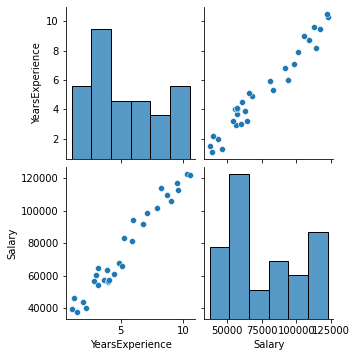

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Salary_Data.csv')
data.head()

x = data.drop(['Salary'], axis = True)
y = data['Salary']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=12)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 
sns.pairplot(data)


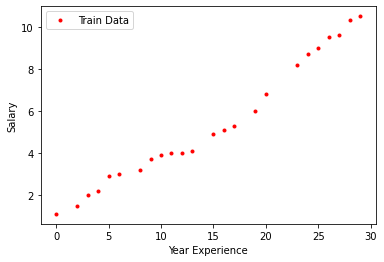

In [7]:
plt.plot(x_train,'r.',label='Train Data')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test).round(1)
cal=pd.DataFrame(np.c_[y_test,y_pred],columns=['Original Salary','Predicted Salary'])
print('Coeffient',model.coef_)
print('Intercept',model.intercept_)
print('Accunracy',model.score(x_test,y_test))

Coeffient [9509.9963271]
Intercept 25243.603151676223
Accunracy 0.9429269163491423


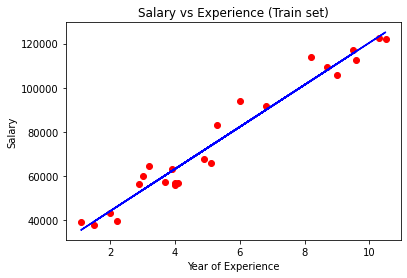

In [9]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()